# 1/14th Degree SouthWest-Atlantic Grid

#### Generating a SouthWest-Atlantic Grid based on NWA25

Previous:
In this example, we'll create a Mercator regular lat-lon grid off the coast of the Mid-Atlantic South America from scratch using the [GridTools python library](https://github.com/ESMG/gridtools/tree/main/gridtools). Once the grid is created, we'll generate bathymetry files that match our grid resolution and size. We'll show an example on how to manually edit specific cells of the bathymetry file. Finally, we'll generate the exchange files to wrap up the requirements for MOM6 input. 

### Create the Grid

In [1]:
#!/bin/env python3
# conda: gridTools
import sys, os, logging, cartopy
from gridtools.gridutils import GridUtils
%matplotlib inline

# Set a place to write files - I created a midatlantic folder in my Downloads Directory, but you can put this wherever
wrkDir = './outputs'
# create an INPUT directory inside of our midatlantic directory
inputDir = os.path.join(wrkDir, 'INPUT')

# Initialize a grid object
grd = GridUtils()

# Make sure we erase any previous grid, grid parameters and plot parameters.
grd.clearGrid()

# Specify the grid parameters with dictionary declarations similar ot KWARGS
# gridMode should be 2.0 for supergrid
# to read up more on the arguments, here is the function - https://github.com/ESMG/gridtools/blob/2c15d5e82a28e1d485e669bbdbd3653be0b54e5b/gridtools/gridutils.py#L2173
grd.setGridParameters({
    'projection': {
        'name': 'Mercator',
        'lon_0': 321.0,
        'lat_0': -25.0,
        'ellps': 'WGS84'
    },
    'centerX': 321.0,
    'centerY': -25.0,
    'centerUnits': 'degrees',
    'dx': 60,
    'dxUnits': 'degrees',
    'dy': 60,
    'dyUnits': 'degrees',
    'tilt': 0.0,
    'gridResolution': 0.07,
    'gridResolutionUnits': 'degrees',
    'gridMode': 2.0,
    'gridType': 'MOM6',
    'ensureEvenI': True,
    'ensureEvenJ': True,
    'tileName': 'tile1',
})

# print our grid parameters of our grid class 
grd.showGridParameters()


Current grid parameters:
          projection: {'name': 'Mercator', 'lon_0': 321.0, 'lat_0': -25.0, 'ellps': 'WGS84'}
             centerX: 321.0
             centerY: -25.0
         centerUnits: degrees
                  dx: 60
             dxUnits: degrees
                  dy: 60
             dyUnits: degrees
                tilt: 0.0
      gridResolution: 0.07
 gridResolutionUnits: degrees
            gridMode: 2.0
            gridType: MOM6
         ensureEvenI: True
         ensureEvenJ: True
            tileName: tile1


In [2]:
# officially make the grid based on our parameters
grd.makeGrid()

# Define plot parameters so we can see what the grid looks like
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'projection': {
            'name': 'Mercator',
            'lat_0': -25.0,
            'lon_0': 321.0
        },
        'extent': [-110.0 ,0.0, 30.0, -70.0],
        'iLinewidth': 0.1,
        'jLinewidth': 0.1,
        'showGridCells': True,
        'title': "Mercator: 0.6 deg x 0.6 deg",
        'satelliteHeight': 35785831.0,
        'transform': cartopy.crs.PlateCarree(),
        'iColor': 'k',
        'jColor': 'k'
    }
)

# display the plotting parameters for our grid
grd.showPlotParameters()


Generating regular lat-lon grid centered at (321.00 -25.00).
   Generated regular lat-lon grid between latitudes -55.00 5.00
   Number of js=1715
INFO: A new grid has been created.
Current plot parameters:
             figsize: (8, 8)
                 dpi: 100.0
              extent: [-110.0, 0.0, 30.0, -70.0]
           extentCRS: <cartopy.crs.PlateCarree object at 0x7f41d3969ad0>
          projection: {'name': 'Mercator', 'lat_0': -25.0, 'lon_0': 321.0}
            showGrid: True
       showGridCells: True
       showSupergrid: False
          iLinewidth: 0.1
          jLinewidth: 0.1
               title: Mercator: 0.6 deg x 0.6 deg
     satelliteHeight: 35785831.0
           transform: <cartopy.crs.PlateCarree object at 0x7f41d3975cb0>
              iColor: k
              jColor: k


### Plot our Grid

/home/nicole/anaconda3/envs/gridTools/lib/python3.7/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/nicole/anaconda3/envs/gridTools/lib/python3.7/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/nicole/anaconda3/envs/gridTools/lib/python3.7/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


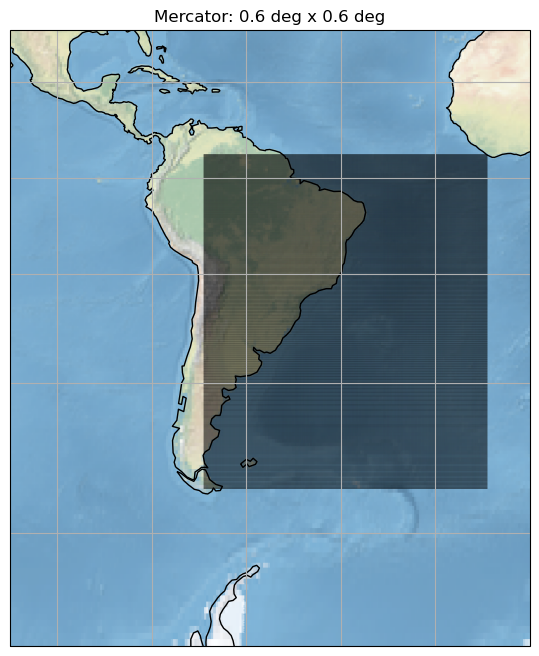

In [3]:

# When we call plotGrid() we have two python objects returned
# Figure object - you have control whether to show the
#   figure or save the contents to an output file
# Axes object - you can further fine tune plot parameters,
#   titles, axis, etc prior to the final plotting of the figure.
#   Some items may be configured via the figure object.

(figure, axes) = grd.plotGrid()
figure

In [4]:
# our grid is an xarray object - let's print it
grd.grid

<xarray.Dataset>
Dimensions:   (nyp: 1715, nxp: 1715, nx: 1714, ny: 1714)
Dimensions without coordinates: nyp, nxp, nx, ny
Data variables:
    x         (nyp, nxp) float64 -69.0 -68.96 -68.93 ... -9.07 -9.035 -9.0
    y         (nyp, nxp) float64 -55.0 -55.0 -55.0 -55.0 ... 5.0 5.0 5.0 5.0
    tile      <U5 'tile1'
    dx        (nyp, nx) float64 2.235e+03 2.235e+03 ... 3.882e+03 3.882e+03
    dy        (ny, nxp) float64 3.897e+03 3.897e+03 ... 3.897e+03 3.897e+03
    angle_dx  (nyp, nxp) float64 0.0 0.0 1.769e-13 0.0 0.0 ... 0.0 0.0 0.0 0.0
    area      (ny, nx) float64 8.714e+06 8.714e+06 ... 1.513e+07 1.513e+07
Attributes: (12/14)
    grid_version:      0.2
    code_version:      GridTools: 0.3.2
    history:           2023-04-27 13:11:55: created grid with GridTools library
    projection:        Mercator
    grid_centerX:      321.0
    grid_centerY:      -25.0
    ...                ...
    grid_dxUnits:      degrees
    grid_dy:           60
    grid_dyUnits:      degrees
    grid_tilt:         0.0
    software_version:  Cython 0.29.30; IPython 7.31.1; backcall 0.2.0; bottle...
    proj:              +ellps=WGS84 +proj=merc +lon_0=321.0 +x_0=0.0 +y_0=0.0...

In [5]:
# Save the new grid to a netCDF file
grd.saveGrid(filename=os.path.join(wrkDir, "ocean_hgrid.nc"))

Successfully wrote netCDF file to ./outputs/ocean_hgrid.nc


## Generate Bathymetry & Roughness

Now that our grid is created, we need to create a matching variables that contain information for each grid cell. Namely, we're after the topographic depth of the cell, the ocean floor roughness of the grid cell, and whether the grid cell is geolocated over ocean or land. Note that computing bathymetric roughness may take a few minutes. Note here that we are also going to use the `applyExistingLandmask` function to set any ocean mask points with a depth shallower than 0.0 meters will be set to 0.0 meters. To generate these variables we'll use the BathyUtils library located here - https://github.com/ESMG/gridtools/blob/main/gridtools/bathyutils.py

In [6]:
from gridtools.datasource import DataSource
import pdb
import xarray as xr

# define GEBCO file path
bathPath = './GEBCO_2021.nc'
#bathPath= '/home/nicole/mom/create_grid/grid_regionalFRE/gebco2021_fix-AS.nc'
# External data sources are required
# This creates an empty data source catalog
ds = DataSource()

# Connect the catalog to the grid object
grd.useDataSource(ds)

# For variableMap, matching variable values will be renamed to the
# variable key.  For evalMap, variables in the expression need
# to be in brackets.  If the key is new, a new field will be
# created with the given expression.
ds.addDataSource({
    'GEBCO_2021': {
            'url' : 'file:' + bathPath,
            'variableMap' : {
                    'lat': 'lat',
                    'lon': 'lon',
                    'depth' : 'elevation'
                },
            'evalMap': {
                    'depth' : '-[depth]'
                }
        }
})

# define our bathyGrid output filename
bathyGridFilename = os.path.join(wrkDir, 'ocean_topog.nc')

if os.path.isfile(bathyGridFilename):
    bathyGrids = xr.open_dataset(bathyGridFilename)
else:
    # Data sources cannot be in chunked mode for use in this routine - https://github.com/ESMG/gridtools/blob/2c15d5e82a28e1d485e669bbdbd3653be0b54e5b/gridtools/bathyutils.py#L583
    bathyGrids = grd.computeBathymetricRoughness('ds:GEBCO_2021',
            maxMb=99, superGrid=False, useClipping=False,
            FixByOverlapQHGridShift=True,
            auxVariables=['hStd', 'hMin', 'hMax', 'depth'],
    )

    # This is needed to really convert the elevation field to depth
    # The 'depth' field has to be requested as an auxVariables
    grd.applyEvalMap('ds:GEBCO_2021', bathyGrids)
    
    # Write ocean_mask.nc and land_mask.nc based on existing field
    grd.writeOceanmask(bathyGrids, 'depth', 'mask',
            os.path.join(wrkDir, 'ocean_mask.nc'),
            MASKING_DEPTH=0.0)
    grd.writeLandmask(bathyGrids, 'depth', 'mask',
            os.path.join(wrkDir, 'land_mask.nc'),
            MASKING_DEPTH=0.0)

    
    # Argument notes:
    #  * Any ocean mask points shallower than a depth of 1000.0 meters will be set to 1000.0 meters
    #  * Any land mask points that become ocean will be set to a depth of 100.0 meters
    #  * Any ocean points that become land will have a depth of 0.0 meters
    
    bathyGrids['newDepth'] = grd.applyExistingLandmask(bathyGrids, 'depth',
            os.path.join(wrkDir, 'land_mask.nc'), 'mask',
            MASKING_DEPTH=0.0, MINIMUM_DEPTH=0.0, MAXIMUM_DEPTH=-99999.0)
    bathyGrids['newDepth'].attrs['units'] = 'meters'
    bathyGrids['newDepth'].attrs['standard_name'] = 'topographic depth at Arakawa C h-points'

    # Write grid variables out to a file as netCDF
    bathyGrids.to_netcdf(os.path.join(wrkDir, 'ocean_topog.nc'),
            encoding=grd.removeFillValueAttributes(data=bathyGrids))
    print('done')


### Plot Bathymetry Variables

We just saved our bathymetry grid variables to a netCDF file. Let's open this up and plot our variables. 

In [7]:
# Display our ocean_topog_midatlanticLCC.nc file 
topo = xr.open_dataset(wrkDir + '/ocean_topog.nc')

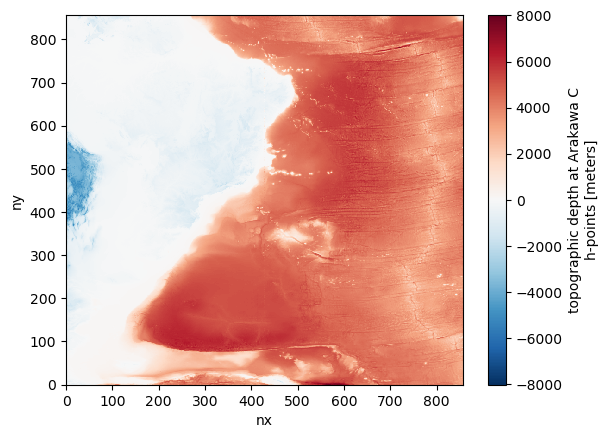

In [8]:
# use default xarray plotting routines for new depth
topo.depth.plot()

## Ocean Mask / Ocean Fraction

When we used the `computeBathymetricRoughness()` above, we created an ocean mask (aka ocean fraction) variable. We saved this variable to it's own netCDF file and called it `ocean_mask_midatlanticLCC.nc`. Let's take a look at this file

In [9]:
oMask = xr.open_dataset(wrkDir + "/ocean_mask.nc")

/home/nicole/anaconda3/envs/gridTools/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


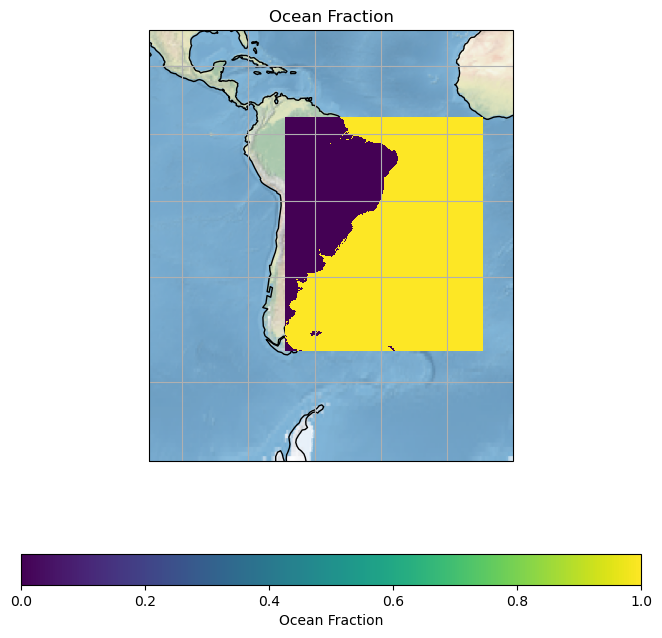

In [10]:
# Show mask variable
(figure, axes) = grd.plotGrid(
    showModelGrid=False,
    plotVariables={
        'Ocean Fraction': {
            'values': oMask['mask'],
            'title': 'Ocean Fraction',
            'cbar_kwargs': {
                'orientation': 'horizontal',
            }
        }
    },
)
figure

# Editing Ocean Mask 

Edit out the Hudson Bay

In [11]:
import xarray as xr
wrkDir = './outputs'
topo = xr.open_dataset(wrkDir + '/ocean_topog.nc')

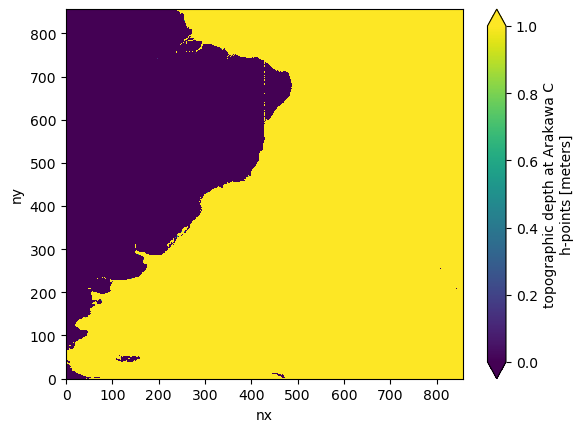

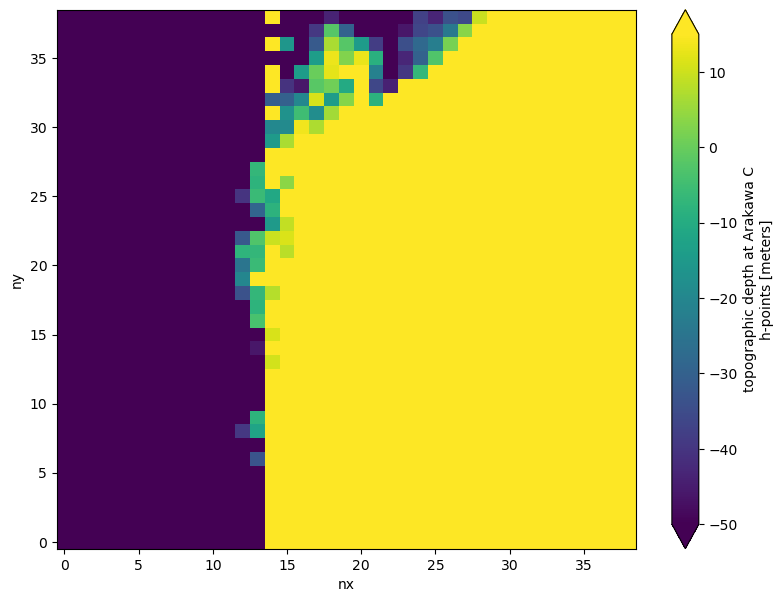

In [12]:
topo.depth.plot(vmin=0,vmax=1)
x = 433; y = 586
dx=19

topo.depth.isel(nx=slice(x-dx,x+dx+1),ny=slice(y-dx,y+dx+1)).plot(
                            vmin=-50,vmax=15,size=7)


In [13]:
tilt_x=-157 #tilt applied to remove Pacific in the domain and extend it into east
MIN_DEPTH=15 #fake_ocean
LAND=-5     #fake_land

hudson = topo.copy()

################################################################################
# Mask Out Inner 1
for y in range(700,800):
    for x in range(300+tilt_x,400+tilt_x):
            hudson.depth[y,x] = LAND             

# Mask Out Inner 2
for y in range(500,700):
    for x in range(400+tilt_x,500+tilt_x):
        hudson.depth[y,x] = LAND
        
for y in range(600,741):
    for x in range(0,431): #(new!)
        hudson.depth[y,x] = LAND
            
# Mask Out Top
for y in range(800,len(hudson.ny)):
    for x in range(300+tilt_x,400+tilt_x):
        if y > 800 and x < 400+tilt_x:
            hudson.depth[y,x] = LAND           
# Mask Out Amazon 1
for y in range(700,780):
    for x in range(400+tilt_x,440+tilt_x):
            hudson.depth[y,x] = LAND
# Mask Out Amazon 2
for y in range(700,780):
    for x in range(500+tilt_x,550+tilt_x):
        if y < 743 and x < 525+tilt_x:
            hudson.depth[y,x] = LAND

# Mask Out Northeast Coast
for y in range(550,620):
    for x in range(550+tilt_x,620+tilt_x):
        if y > 565 and x < 585+tilt_x:
            hudson.depth[y,x] = LAND    
        #if y in range(585,603) and x in range(588+tilt_x,591+tilt_x):  
            #hudson.depth[y,x] = MIN_DEPTH    

# Mask Out South BR
for y in range(300,400):
    for x in range(300+tilt_x,500+tilt_x):
        if y < 320 and x < 350+tilt_x:
            hudson.depth[y,x] = LAND
        if y > 377 and x < 445+tilt_x:
            hudson.depth[y,x] = LAND
        if y in range(389,393) and x < 450+tilt_x:
            hudson.depth[y,x] = LAND
        if y in range(366,369) and x < 433+tilt_x:
            hudson.depth[y,x] = LAND
        if y in range(364,369) and x < 432+tilt_x:
            hudson.depth[y,x] = LAND  
        if y in range(303,320) and x in range(372+tilt_x,382+tilt_x):  
            hudson.depth[y,x] = LAND
        if y in range(311,320) and x in range(382+tilt_x,387+tilt_x):  
            hudson.depth[y,x] = LAND
        if y in range(314,326) and x in range(382+tilt_x,391+tilt_x):  
            hudson.depth[y,x] = LAND
        if y in range(326,335) and x in range(393+tilt_x,400+tilt_x):  
            hudson.depth[y,x] = LAND
        if y in range(344,354) and x in range(408+tilt_x,420+tilt_x):  
            hudson.depth[y,x] = LAND
        if y in range(337,344) and x in range(400+tilt_x,414+tilt_x):  
            hudson.depth[y,x] = LAND           
        if y in range(334,337) and x in range(400+tilt_x,411+tilt_x):  
            hudson.depth[y,x] = LAND 
        if y in range(332,334) and x in range(400+tilt_x,408+tilt_x):  
            hudson.depth[y,x] = LAND
        if y in range(330,332) and x in range(400+tilt_x,406+tilt_x):  
            hudson.depth[y,x] = LAND
        if y in range(328,330) and x in range(399+tilt_x,402+tilt_x):  
            hudson.depth[y,x] = MIN_DEPTH  #Rio Grandeout
# Mask Out Rio Prata
for y in range(200,300):
    for x in range(300+tilt_x,400+tilt_x):
        if y in range(292,296) and x in range(370+tilt_x,373+tilt_x):  
            hudson.depth[y,x] = LAND  
# Mask Out ARG Coast
#for y in range(200,300):
#    for x in range(200+tilt_x,300+tilt_x):
#        if y < 240 and x < 252+tilt_x:  
#            hudson.depth[y,x] = LAND
        #if y < 227 and x > 255+tilt_x:  
        #    hudson.depth[y,x] = MIN_DEPTH
        #if y < 209 and x > 253+tilt_x:  
        #    hudson.depth[y,x] = MIN_DEPTH
        
# Mask Out South-ARG Coast
for y in range(0,100):
    for x in range(0,200+tilt_x):
        if y > 69 and x < 170+tilt_x:  
            hudson.depth[y,x] = LAND
        if y > 79 and x < 175+tilt_x:  
            hudson.depth[y,x] = LAND
        if y < 23 and x < 154+tilt_x:  
            hudson.depth[y,x] = LAND
        if y < 9 and x < 185+tilt_x:  
            hudson.depth[y,x] = LAND
# Mask Out Southern Domain
for y in range(0,100):
    for x in range(200+tilt_x,700+tilt_x):
        if y < 3 and x < 208+tilt_x:  
            hudson.depth[y,x] = MIN_DEPTH  
        if y in range(48,52) and x in range(297+tilt_x,300+tilt_x):    
            hudson.depth[y,x] = MIN_DEPTH  #Falklands
        if y in range(43,45) and x in range(289+tilt_x,292+tilt_x):    
            hudson.depth[y,x] = MIN_DEPTH  #Falklands            
        if y in range(45,47) and x in range(292+tilt_x,293+tilt_x):    
            hudson.depth[y,x] = MIN_DEPTH  #Falklands.
        if y in range(40,42) and x in range(286+tilt_x,288+tilt_x):    
            hudson.depth[y,x] = MIN_DEPTH  #Falklands 
        if y in range(42,44) and x in range(286+tilt_x,288+tilt_x):    
            hudson.depth[y,x] = MIN_DEPTH  #Falklands
        if y in range(44,46) and x in range(291+tilt_x,293+tilt_x):    
            hudson.depth[y,x] = MIN_DEPTH  #Falklands
        if y in range(46,52) and x in range(277+tilt_x,283+tilt_x):    
            hudson.depth[y,x] = LAND #Falklands
        if y in range(41,43) and x in range(303+tilt_x,306+tilt_x):    
            hudson.depth[y,x] = LAND #Falklands
# Mask Out Southeast BR Coast - last edit
for y in range(400,500):
    for x in range(400+tilt_x,600+tilt_x):
        if x < 445+tilt_x:
            hudson.depth[y,x] = LAND    #ok
        if y in range(470,472) and x in range(550+tilt_x,554+tilt_x):  
            hudson.depth[y,x] = LAND
        if y in range(457,460) and x in range(525+tilt_x,530+tilt_x):  
            hudson.depth[y,x] = LAND
        if y in range(419,422) and x in range(448+tilt_x,452+tilt_x):  
            hudson.depth[y,x] = MIN_DEPTH
        if y in range(414,416) and x in range(446+tilt_x,450+tilt_x):  
            hudson.depth[y,x] = MIN_DEPTH
        if y in range(408,410) and x in range(446+tilt_x,450+tilt_x):  
            hudson.depth[y,x] = MIN_DEPTH 
# Mask Out Amazon 3 - last edit
for y in range(700,780):
    for x in range(500+tilt_x,550+tilt_x):
        if y in range(740,747) and x in range(504+tilt_x,508+tilt_x):
            hudson.depth[y,x] = MIN_DEPTH
        if y in range(749,751) and x in range(508+tilt_x,510+tilt_x): 
            hudson.depth[y,x] = MIN_DEPTH
        if y in range(745,748) and x in range(510+tilt_x,515+tilt_x): 
            hudson.depth[y,x] = LAND       
# Flooding Southern Islands - much close to the boundaries
#for y in range(0,100):
#    for x in range(200+tilt_x,700+tilt_x):
#        if y in range(0,5) and x in range(208+tilt_x,231+tilt_x):  
#            hudson.depth[y,x] = MIN_DEPTH
#        if y in range(0,15) and x in range(598+tilt_x,631+tilt_x):  
#            hudson.depth[y,x] = MIN_DEPTH

In [14]:
hudson.depth.where(hudson.depth<=0,LAND)
#for y in range(0,len(hudson.ny)):
#    for x in range(0,len(hudson.nx)):
#        if hudson.depth[y,x] < 0:
#            hudson.depth[y,x] = LAND

<xarray.DataArray 'depth' (ny: 857, nx: 857)>
array([[  -5.    ,   -5.    ,   -5.    , ...,   -5.    ,   -5.    ,
          -5.    ],
       [  -5.    ,   -5.    ,   -5.    , ...,   -5.    ,   -5.    ,
          -5.    ],
       [  -5.    ,   -5.    ,   -5.    , ...,   -5.    ,   -5.    ,
          -5.    ],
       ...,
       [-111.1875, -100.1875, -107.4375, ...,   -5.    ,   -5.    ,
          -5.    ],
       [-122.75  , -117.4375, -104.3125, ...,   -5.    ,   -5.    ,
          -5.    ],
       [-131.    , -127.    , -125.    , ...,   -5.    ,   -5.    ,
          -5.    ]])
Dimensions without coordinates: ny, nx
Attributes:
    units:          meters
    standard_name:  topographic depth at Arakawa C h-points
    sha256:         cb3acdf8bd0b741d84b3dda5ce2de086c1952148ab189f0ba9f009c26...

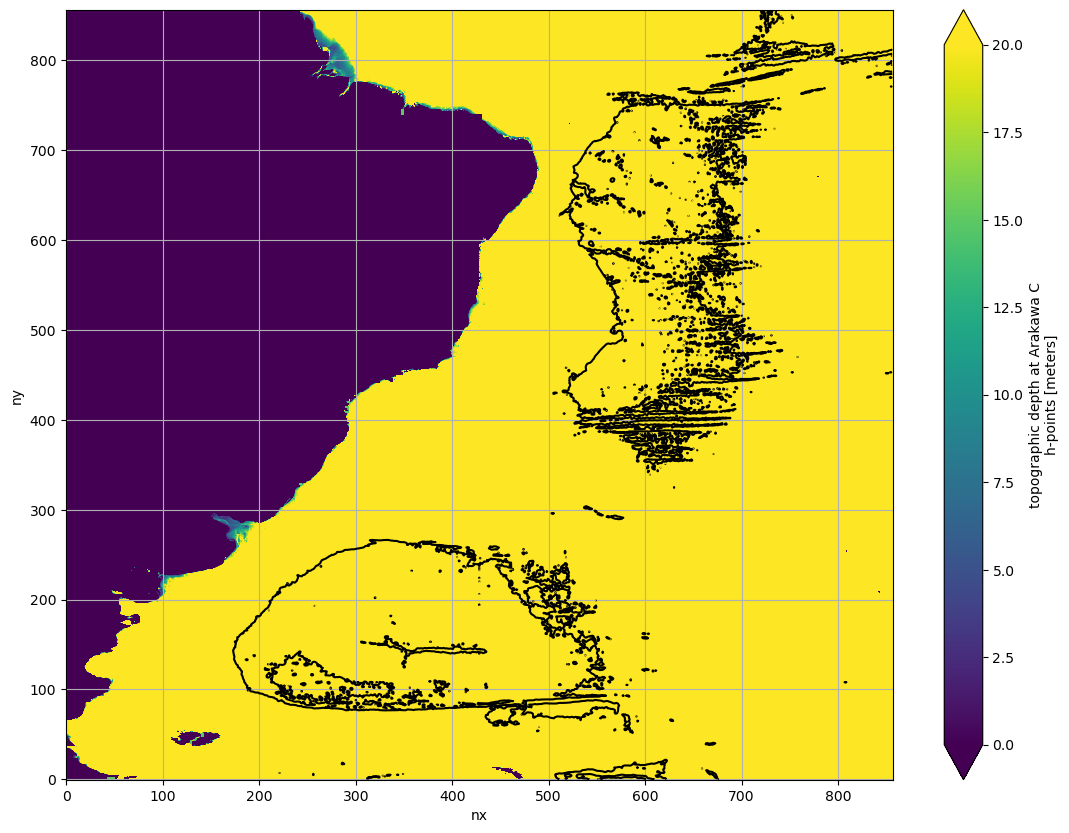

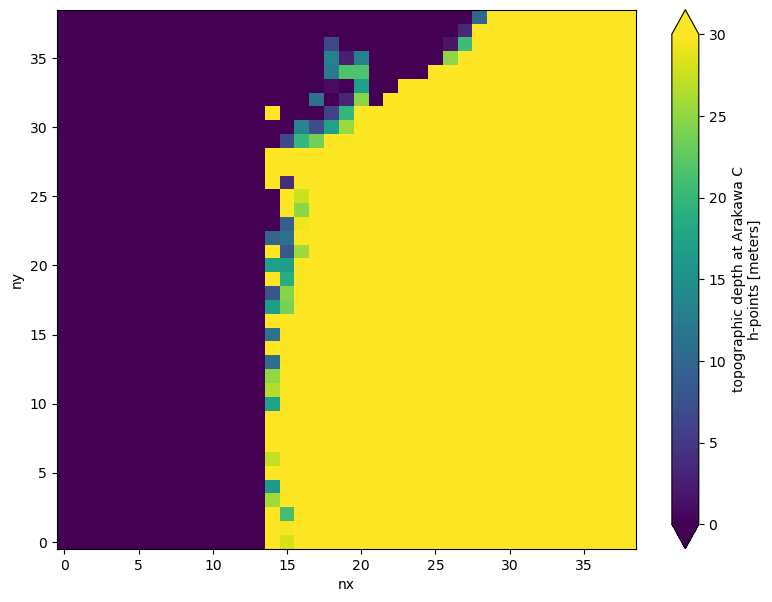

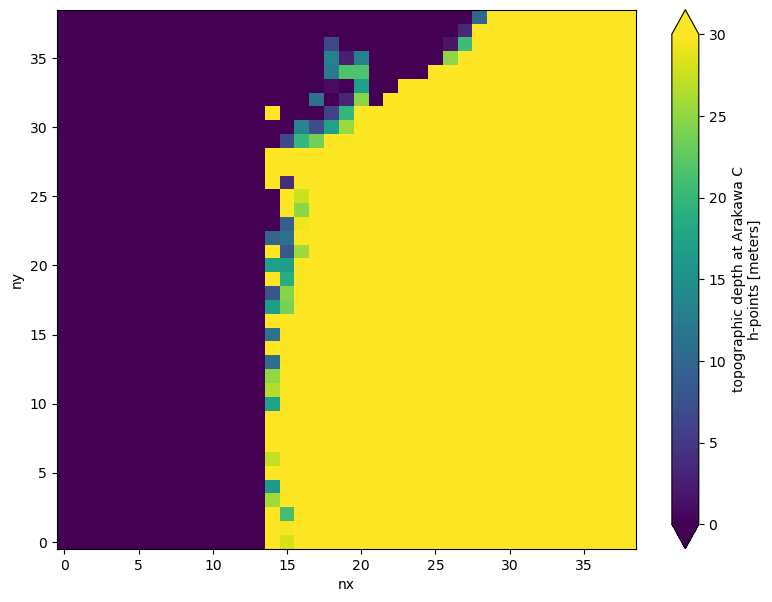

In [15]:
#p=hudson.depth.isel(ny=slice(0,100),nx=slice(200,700)).plot(vmin=0,vmax=1, size=10)
#p=hudson.depth.isel(ny=slice(200,300),nx=slice(100,300)).plot(vmin=-5,vmax=30,size=10,cmap='jet')
#p=hudson.depth.plot(vmin=0,vmax=1, size=10)
import matplotlib.pyplot as plt
import numpy as np
#p=hudson.depth.plot( size=10, cmap= 'gist_earth', levels=np.arange(0,8000,1000))
p=hudson.depth.plot(vmin=0,vmax=20, size=10)
plt.contour(hudson.depth,colors='k',levels=np.arange(5000,8000,1000))
p.axes.grid()
plt.savefig('bathymetry.gebco2021.png')

x = 433; y = 586
dx=19

topo.depth.isel(nx=slice(x-dx,x+dx+1),ny=slice(y-dx,y+dx+1)).plot(
                            vmin=0,vmax=30,size=7)
hudson.depth.isel(nx=slice(x-dx,x+dx+1),ny=slice(y-dx,y+dx+1)).plot(
                            vmin=0,vmax=30,size=7)


# Edit Land Mask Cells

In [16]:
land_mask = xr.open_dataset(wrkDir+ "/land_mask.nc")

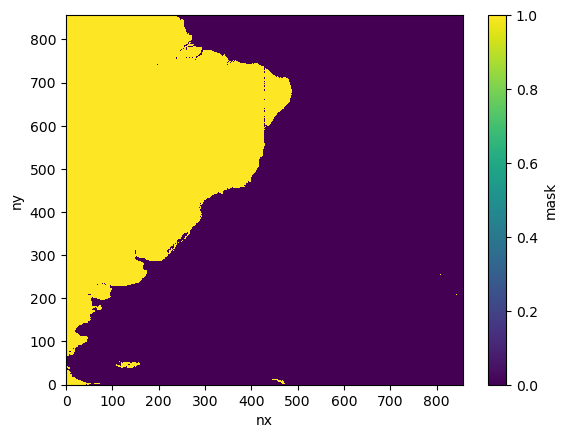

In [17]:
land_mask.mask.plot()

In [18]:
hudson_land = land_mask
tilt_x=-157 #tilt applied to remove Pacific in the domain and extend it into east
MIN_DEPTH=0 #fake_ocean
LAND=1     #face_land
# Mask Out Pacific Central
hudson = topo.copy()

################################################################################
# Mask Out Inner 1
for y in range(700,800):
    for x in range(300+tilt_x,400+tilt_x):
            hudson_land.mask[y,x] = LAND             

# Mask Out Inner 2
for y in range(500,700):
    for x in range(400+tilt_x,500+tilt_x):
        hudson_land.mask[y,x] = LAND
        
for y in range(600,741):
    for x in range(0,431): #(new!)
        hudson_land.mask[y,x] = LAND
            
# Mask Out Top
for y in range(800,len(hudson_land.ny)):
    for x in range(300+tilt_x,400+tilt_x):
        if y > 800 and x < 400+tilt_x:
            hudson_land.mask[y,x] = LAND           
# Mask Out Amazon 1
for y in range(700,780):
    for x in range(400+tilt_x,440+tilt_x):
            hudson_land.mask[y,x] = LAND
# Mask Out Amazon 2
for y in range(700,780):
    for x in range(500+tilt_x,550+tilt_x):
        if y < 743 and x < 525+tilt_x:
            hudson_land.mask[y,x] = LAND

# Mask Out Northeast Coast
for y in range(550,620):
    for x in range(550+tilt_x,620+tilt_x):
        if y > 565 and x < 585+tilt_x:
            hudson_land.mask[y,x] = LAND    
        #if y in range(585,603) and x in range(588+tilt_x,591+tilt_x):  
        #    hudson_land.mask[y,x] = MIN_DEPTH    

# Mask Out South BR
for y in range(300,400):
    for x in range(300+tilt_x,500+tilt_x):
        if y < 320 and x < 350+tilt_x:
            hudson_land.mask[y,x] = LAND
        if y > 377 and x < 445+tilt_x:
            hudson_land.mask[y,x] = LAND
        if y in range(389,393) and x < 450+tilt_x:
            hudson_land.mask[y,x] = LAND
        if y in range(366,369) and x < 433+tilt_x:
            hudson_land.mask[y,x] = LAND
        if y in range(364,369) and x < 432+tilt_x:
            hudson_land.mask[y,x] = LAND  
        if y in range(303,320) and x in range(372+tilt_x,382+tilt_x):  
            hudson_land.mask[y,x] = LAND
        if y in range(311,320) and x in range(382+tilt_x,387+tilt_x):  
            hudson_land.mask[y,x] = LAND
        if y in range(314,326) and x in range(382+tilt_x,391+tilt_x):  
            hudson_land.mask[y,x] = LAND
        if y in range(326,335) and x in range(393+tilt_x,400+tilt_x):  
            hudson_land.mask[y,x] = LAND
        if y in range(344,354) and x in range(408+tilt_x,420+tilt_x):  
            hudson_land.mask[y,x] = LAND
        if y in range(337,344) and x in range(400+tilt_x,414+tilt_x):  
            hudson_land.mask[y,x] = LAND           
        if y in range(334,337) and x in range(400+tilt_x,411+tilt_x):  
            hudson_land.mask[y,x] = LAND 
        if y in range(332,334) and x in range(400+tilt_x,408+tilt_x):  
            hudson_land.mask[y,x] = LAND
        if y in range(330,332) and x in range(400+tilt_x,406+tilt_x):  
            hudson_land.mask[y,x] = LAND
        if y in range(328,330) and x in range(399+tilt_x,402+tilt_x):  
            hudson_land.mask[y,x] = MIN_DEPTH  #Rio Grandeout
# Mask Out Rio Prata
for y in range(200,300):
    for x in range(300+tilt_x,400+tilt_x):
        if y in range(292,296) and x in range(370+tilt_x,373+tilt_x):  
            hudson_land.mask[y,x] = LAND  
# Mask Out ARG Coast
#for y in range(200,300):
#    for x in range(200+tilt_x,300+tilt_x):
#        if y < 240 and x < 252+tilt_x:  
#            hudson_land.mask[y,x] = LAND
        #if y < 227 and x > 255+tilt_x:  
        #    hudson_land.mask[y,x] = MIN_DEPTH
        #if y < 209 and x > 253+tilt_x:  
        #    hudson_land.mask[y,x] = MIN_DEPTH
# Mask Out South-ARG Coast
for y in range(0,100):
    for x in range(0,200+tilt_x):
        if y > 69 and x < 170+tilt_x:  
            hudson_land.mask[y,x] = LAND
        if y > 79 and x < 175+tilt_x:  
            hudson_land.mask[y,x] = LAND
        if y < 23 and x < 154+tilt_x:  
            hudson_land.mask[y,x] = LAND
        if y < 9 and x < 185+tilt_x:  
            hudson_land.mask[y,x] = LAND
# Mask Out Southern Domain
for y in range(0,100):
    for x in range(200+tilt_x,700+tilt_x):
        if y < 3 and x < 208+tilt_x:  
            hudson_land.mask[y,x] = MIN_DEPTH  
        if y in range(48,52) and x in range(297+tilt_x,300+tilt_x):    
            hudson_land.mask[y,x] = MIN_DEPTH  #Falklands
        if y in range(43,45) and x in range(289+tilt_x,292+tilt_x):    
            hudson_land.mask[y,x] = MIN_DEPTH  #Falklands            
        if y in range(45,47) and x in range(292+tilt_x,293+tilt_x):    
            hudson_land.mask[y,x] = MIN_DEPTH  #Falklands.
        if y in range(40,42) and x in range(286+tilt_x,288+tilt_x):    
            hudson_land.mask[y,x] = MIN_DEPTH  #Falklands 
        if y in range(42,44) and x in range(286+tilt_x,288+tilt_x):    
            hudson_land.mask[y,x] = MIN_DEPTH  #Falklands
        if y in range(44,46) and x in range(291+tilt_x,293+tilt_x):    
            hudson_land.mask[y,x] = MIN_DEPTH  #Falklands
        if y in range(46,52) and x in range(277+tilt_x,283+tilt_x):    
            hudson_land.mask[y,x] = LAND #Falklands
        if y in range(41,43) and x in range(303+tilt_x,306+tilt_x):    
            hudson_land.mask[y,x] = LAND #Falklands
# Mask Out Southeast BR Coast - last edit
for y in range(400,500):
    for x in range(400+tilt_x,600+tilt_x):
        if x < 445+tilt_x:
            hudson_land.mask[y,x] = LAND    #ok
        if y in range(470,472) and x in range(550+tilt_x,554+tilt_x):  
            hudson_land.mask[y,x] = LAND
        if y in range(457,460) and x in range(525+tilt_x,530+tilt_x):  
            hudson_land.mask[y,x] = LAND
        if y in range(419,422) and x in range(448+tilt_x,452+tilt_x):  
            hudson_land.mask[y,x] = MIN_DEPTH
        if y in range(414,416) and x in range(446+tilt_x,450+tilt_x):  
            hudson_land.mask[y,x] = MIN_DEPTH
        if y in range(408,410) and x in range(446+tilt_x,450+tilt_x):  
            hudson_land.mask[y,x] = MIN_DEPTH 
# Mask Out Amazon 3 - last edit
for y in range(700,780):
    for x in range(500+tilt_x,550+tilt_x):
        if y in range(740,747) and x in range(504+tilt_x,508+tilt_x):
            hudson_land.mask[y,x] = MIN_DEPTH
        if y in range(749,751) and x in range(508+tilt_x,510+tilt_x): 
            hudson_land.mask[y,x] = MIN_DEPTH
        if y in range(745,748) and x in range(510+tilt_x,515+tilt_x): 
            hudson_land.mask[y,x] = LAND       
# Flooding Southern Islands - much close to the boundaries
for y in range(0,100):
    for x in range(200+tilt_x,700+tilt_x):
        if y in range(0,5) and x in range(208+tilt_x,231+tilt_x):  
            hudson_land.mask[y,x] = MIN_DEPTH
        if y in range(0,15) and x in range(598+tilt_x,631+tilt_x):  
            hudson_land.mask[y,x] = MIN_DEPTH

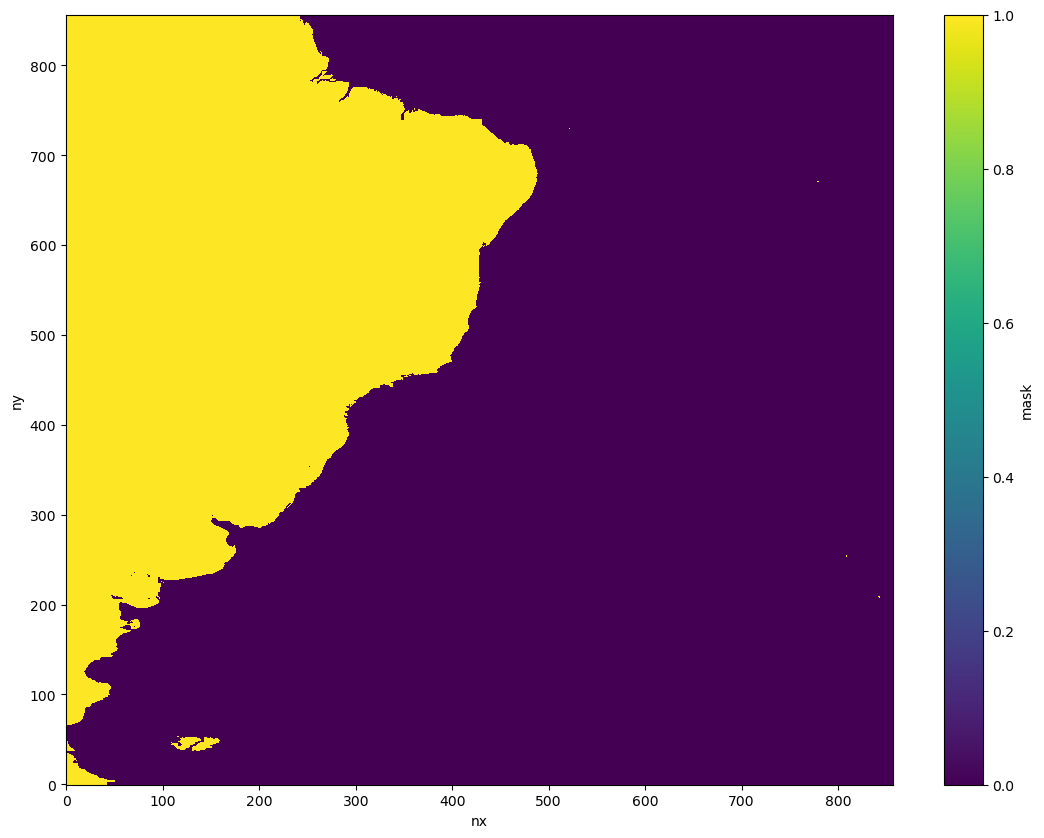

In [19]:
hudson_land.mask.plot(size=10)
plt.savefig('land_mask.png')

# Edit Ocean Mask Cells

In [20]:
ocean_mask = xr.open_dataset(wrkDir+ "/ocean_mask.nc")

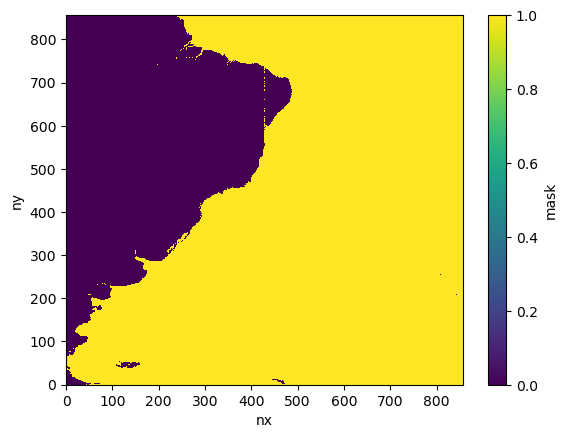

In [21]:
ocean_mask.mask.plot()

In [22]:
hudson_ocean = ocean_mask
MIN_DEPTH=1 #fake_ocean
LAND=0     #face_ocean
# Mask Out Pacific Central
hudson = topo.copy()

################################################################################
# Mask Out Inner 1
for y in range(700,800):
    for x in range(300+tilt_x,400+tilt_x):
            hudson_ocean.mask[y,x] = LAND             

# Mask Out Inner 2
for y in range(500,700):
    for x in range(400+tilt_x,500+tilt_x):
        hudson_ocean.mask[y,x] = LAND
        
for y in range(600,741):
    for x in range(0,431): #(new!)
        hudson_ocean.mask[y,x] = LAND
            
# Mask Out Top
for y in range(800,len(hudson_ocean.ny)):
    for x in range(300+tilt_x,400+tilt_x):
        if y > 800 and x < 400+tilt_x:
            hudson_ocean.mask[y,x] = LAND           
# Mask Out Amazon 1
for y in range(700,780):
    for x in range(400+tilt_x,440+tilt_x):
            hudson_ocean.mask[y,x] = LAND
# Mask Out Amazon 2
for y in range(700,780):
    for x in range(500+tilt_x,550+tilt_x):
        if y < 743 and x < 525+tilt_x:
            hudson_ocean.mask[y,x] = LAND

# Mask Out Northeast Coast
for y in range(550,620):
    for x in range(550+tilt_x,620+tilt_x):
        if y > 565 and x < 585+tilt_x:
            hudson_ocean.mask[y,x] = LAND    
        #if y in range(585,603) and x in range(588+tilt_x,591+tilt_x):  
        #    hudson_ocean.mask[y,x] = MIN_DEPTH    

# Mask Out South BR
for y in range(300,400):
    for x in range(300+tilt_x,500+tilt_x):
        if y < 320 and x < 350+tilt_x:
            hudson_ocean.mask[y,x] = LAND
        if y > 377 and x < 445+tilt_x:
            hudson_ocean.mask[y,x] = LAND
        if y in range(389,393) and x < 450+tilt_x:
            hudson_ocean.mask[y,x] = LAND
        if y in range(366,369) and x < 433+tilt_x:
            hudson_ocean.mask[y,x] = LAND
        if y in range(364,369) and x < 432+tilt_x:
            hudson_ocean.mask[y,x] = LAND  
        if y in range(303,320) and x in range(372+tilt_x,382+tilt_x):  
            hudson_ocean.mask[y,x] = LAND
        if y in range(311,320) and x in range(382+tilt_x,387+tilt_x):  
            hudson_ocean.mask[y,x] = LAND
        if y in range(314,326) and x in range(382+tilt_x,391+tilt_x):  
            hudson_ocean.mask[y,x] = LAND
        if y in range(326,335) and x in range(393+tilt_x,400+tilt_x):  
            hudson_ocean.mask[y,x] = LAND
        if y in range(344,354) and x in range(408+tilt_x,420+tilt_x):  
            hudson_ocean.mask[y,x] = LAND
        if y in range(337,344) and x in range(400+tilt_x,414+tilt_x):  
            hudson_ocean.mask[y,x] = LAND           
        if y in range(334,337) and x in range(400+tilt_x,411+tilt_x):  
            hudson_ocean.mask[y,x] = LAND 
        if y in range(332,334) and x in range(400+tilt_x,408+tilt_x):  
            hudson_ocean.mask[y,x] = LAND
        if y in range(330,332) and x in range(400+tilt_x,406+tilt_x):  
            hudson_ocean.mask[y,x] = LAND
        if y in range(328,330) and x in range(399+tilt_x,402+tilt_x):  
            hudson_ocean.mask[y,x] = MIN_DEPTH  #Rio Grandeout
# Mask Out Rio Prata
for y in range(200,300):
    for x in range(300+tilt_x,400+tilt_x):
        if y in range(292,296) and x in range(370+tilt_x,373+tilt_x):  
            hudson_ocean.mask[y,x] = LAND  
# Mask Out ARG Coast
for y in range(200,300):
    for x in range(200+tilt_x,300+tilt_x):
        if y < 240 and x < 252+tilt_x:  
            hudson_ocean.mask[y,x] = LAND
        #if y < 227 and x > 255+tilt_x:  
        #    hudson_ocean.mask[y,x] = MIN_DEPTH
        #if y < 209 and x > 253+tilt_x:  
        #    hudson_ocean.mask[y,x] = MIN_DEPTH
# Mask Out South-ARG Coast
for y in range(0,100):
    for x in range(0,200+tilt_x):
        if y > 69 and x < 170+tilt_x:  
            hudson_ocean.mask[y,x] = LAND
        if y > 79 and x < 175+tilt_x:  
            hudson_ocean.mask[y,x] = LAND
        if y < 23 and x < 154+tilt_x:  
            hudson_ocean.mask[y,x] = LAND
        if y < 9 and x < 185+tilt_x:  
            hudson_ocean.mask[y,x] = LAND
# Mask Out Southern Domain
for y in range(0,100):
    for x in range(200+tilt_x,700+tilt_x):
        if y < 3 and x < 208+tilt_x:  
            hudson_ocean.mask[y,x] = MIN_DEPTH  
        if y in range(48,52) and x in range(297+tilt_x,300+tilt_x):    
            hudson_ocean.mask[y,x] = MIN_DEPTH  #Falklands
        if y in range(43,45) and x in range(289+tilt_x,292+tilt_x):    
            hudson_ocean.mask[y,x] = MIN_DEPTH  #Falklands            
        if y in range(45,47) and x in range(292+tilt_x,293+tilt_x):    
            hudson_ocean.mask[y,x] = MIN_DEPTH  #Falklands.
        if y in range(40,42) and x in range(286+tilt_x,288+tilt_x):    
            hudson_ocean.mask[y,x] = MIN_DEPTH  #Falklands 
        if y in range(42,44) and x in range(286+tilt_x,288+tilt_x):    
            hudson_ocean.mask[y,x] = MIN_DEPTH  #Falklands
        if y in range(44,46) and x in range(291+tilt_x,293+tilt_x):    
            hudson_ocean.mask[y,x] = MIN_DEPTH  #Falklands
        if y in range(46,52) and x in range(277+tilt_x,283+tilt_x):    
            hudson_ocean.mask[y,x] = LAND #Falklands
        if y in range(41,43) and x in range(303+tilt_x,306+tilt_x):    
            hudson_ocean.mask[y,x] = LAND #Falklands
# Mask Out Southeast BR Coast - last edit
for y in range(400,500):
    for x in range(400+tilt_x,600+tilt_x):
        if x < 445+tilt_x:
            hudson_ocean.mask[y,x] = LAND    #ok
        if y in range(470,472) and x in range(550+tilt_x,554+tilt_x):  
            hudson_ocean.mask[y,x] = LAND
        if y in range(457,460) and x in range(525+tilt_x,530+tilt_x):  
            hudson_ocean.mask[y,x] = LAND
        if y in range(419,422) and x in range(448+tilt_x,452+tilt_x):  
            hudson_ocean.mask[y,x] = MIN_DEPTH
        if y in range(414,416) and x in range(446+tilt_x,450+tilt_x):  
            hudson_ocean.mask[y,x] = MIN_DEPTH
        if y in range(408,410) and x in range(446+tilt_x,450+tilt_x):  
            hudson_ocean.mask[y,x] = MIN_DEPTH 
# Mask Out Amazon 3 - last edit
for y in range(700,780):
    for x in range(500+tilt_x,550+tilt_x):
        if y in range(740,747) and x in range(504+tilt_x,508+tilt_x):
            hudson_ocean.mask[y,x] = MIN_DEPTH
        if y in range(749,751) and x in range(508+tilt_x,510+tilt_x): 
            hudson_ocean.mask[y,x] = MIN_DEPTH
        if y in range(745,748) and x in range(510+tilt_x,515+tilt_x): 
            hudson_ocean.mask[y,x] = LAND       
# Flooding Southern Islands - much close to the boundaries
for y in range(0,100):
    for x in range(200+tilt_x,700+tilt_x):
        if y in range(0,5) and x in range(208+tilt_x,231+tilt_x):  
            hudson_ocean.mask[y,x] = MIN_DEPTH
        if y in range(0,15) and x in range(598+tilt_x,631+tilt_x):  
            hudson_ocean.mask[y,x] = MIN_DEPTH

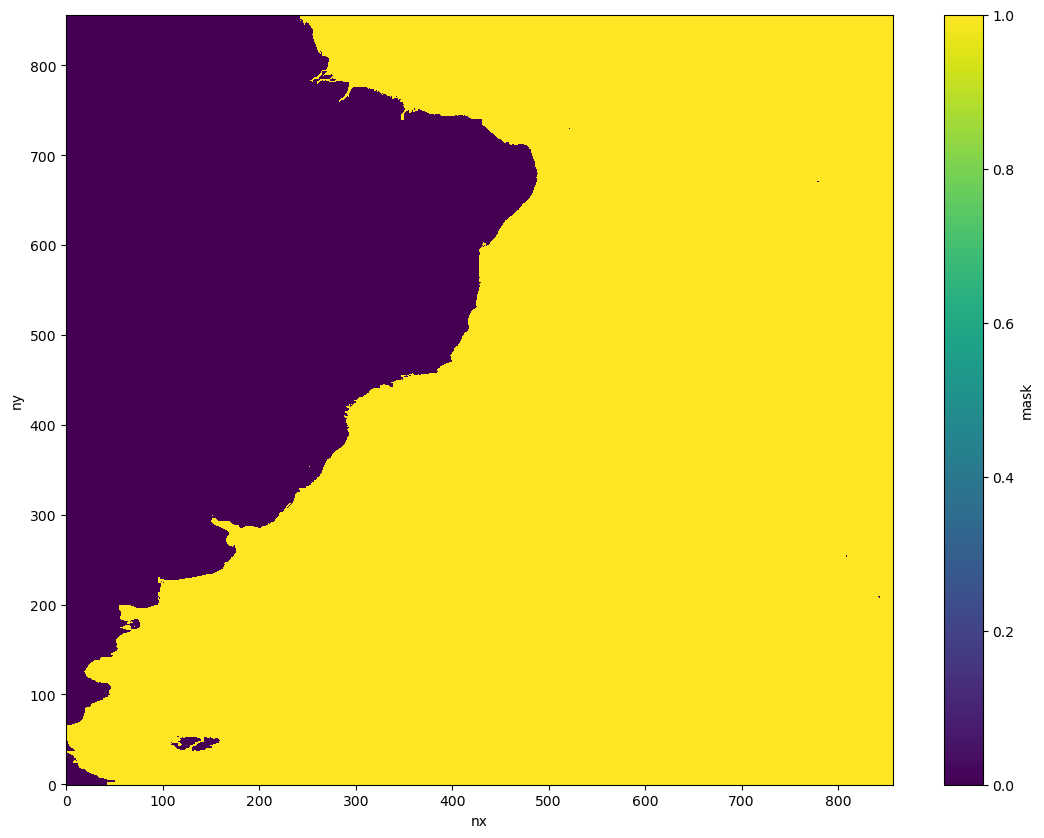

In [23]:
hudson_ocean.mask.plot(size=10)
plt.savefig('ocean_mask.png')

In [24]:
inputDir = "./outputs"
hudson.to_netcdf(inputDir + "ocean_topog.nc", mode='w', format='NETCDF3_64BIT')
hudson_land.to_netcdf(inputDir + "land_mask.nc", mode='w', format='NETCDF3_64BIT')
hudson_ocean.to_netcdf(inputDir + "ocean_mask.nc", mode='w', format='NETCDF3_64BIT')

## Generate Mosaic Files for MOM6

In this step, the mosaic grids are generated. A hint is to link into a new directory to exploit before and after mask comparisons. The new dir must contain the ocean_hgrid.nc

In [26]:
from gridtools.gridutils import GridUtils
import sys, os, logging, cartopy

inputDir = "./outputs_edited/"


# Initialize a grid object
grd = GridUtils()
grd.openGrid(f"{inputDir}ocean_hgrid.nc", gridType='MOM6')
grd.readGrid()

# Write out FMS related support files
grd.makeSoloMosaic(
    topographyGrid=hudson['depth'],
    writeLandmask=True,
    writeOceanmask=True,
    inputDirectory=inputDir,
    overwrite=True,
)
grd.saveGrid(filename=os.path.join(inputDir, "ocean_hgrid_final.nc"))



Successfully wrote netCDF file to ./outputs_edited/ocean_hgrid_final.nc
